In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isna().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
col=[var for var in df.columns if df[var].isna().mean()< .05 and df[var].isna().mean()>0]

In [6]:
df[col]

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [7]:
len(df[col].dropna())/len(df)

0.8968577095730244

In [8]:
new_df=df[col].dropna()
new_df.shape,df.shape

((17182, 5), (19158, 13))

array([[<AxesSubplot:title={'center':'city_development_index'}>,
        <AxesSubplot:title={'center':'experience'}>],
       [<AxesSubplot:title={'center':'training_hours'}>, <AxesSubplot:>]],
      dtype=object)

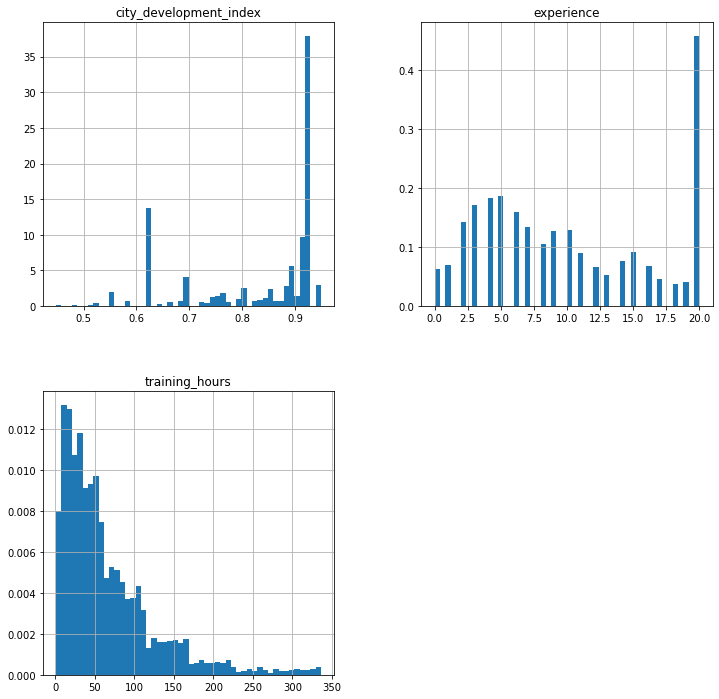

In [9]:
new_df.hist(bins=50,density=True,figsize=(12,12))

<AxesSubplot:>

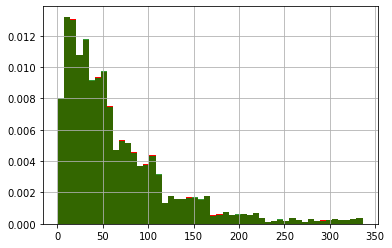

In [21]:
# original data
df['training_hours'].hist(bins=50, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, color='green', density=True,alpha=0.8 )


<AxesSubplot:ylabel='Density'>

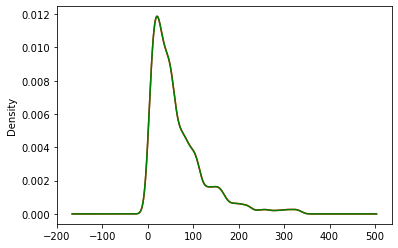

In [22]:
df["training_hours"].plot.density(color="red")
new_df["training_hours"].plot.density(color="green")


(array([  48.,  105.,  473., 2412.,  914.,  396.,  865.,  880., 2144.,
        8945.]),
 array([0.448 , 0.4981, 0.5482, 0.5983, 0.6484, 0.6985, 0.7486, 0.7987,
        0.8488, 0.8989, 0.949 ]),
 <BarContainer object of 10 artists>)

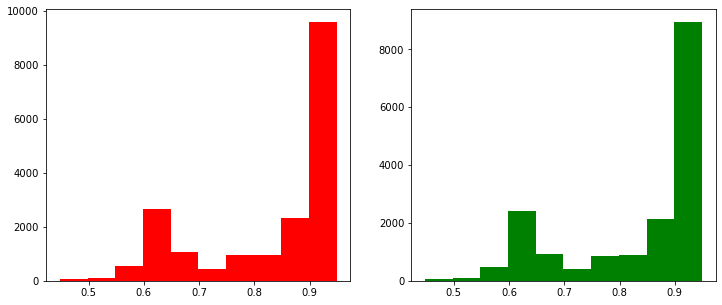

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))


ax1.hist( df['city_development_index'],color="red")

ax2.hist( new_df['city_development_index'],color="green")
# # original data
# df['city_development_index'].hist(bins=50, density=True, color='red')

# # data after cca, the argument alpha makes the color transparent, so we can
# # see the overlay of the 2 distributions
# new_df['city_development_index'].hist(bins=50, color='green', density=True, alpha=0.8)